<a href="https://colab.research.google.com/github/akagam1/ERC-Induction-Assignment-2022/blob/main/Neural%20Network/digits_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary of the experience

Creating a neural network from the ground up was a very interesting experience. Not relying on any ML frameworks for the neural netwrok meant I was working much more closely with the mathematics behind a neural network, which is what really drew my interest towards this project. Since I attempted the mini-projects as well, I had already implemented a much more scaled down version of this current neural netowrk (3 layers: 2 input -> n-hidden neurons (set at 2) -> 1 output), therefore it was only a matter of scaling the previous structure by another layer (4 layers: 784 input -> 350 -> 150 -> 10 output). The biggest difficulty that I faced was finding time to train the neural network. My last successful attempt was a 48 minute runtime which resulted in only 11% accuracy. When I increased the number of epochs, it ran for about 3 hours and 20 minutes before colab disconnected and the results were lost. Since this is essentialy the same code as the xor gate neural netowrk but just scaled up, I'm confident there aren't any logical errors as such, and if it were to run properly without interruptions, it will give an acceptable result.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import expit

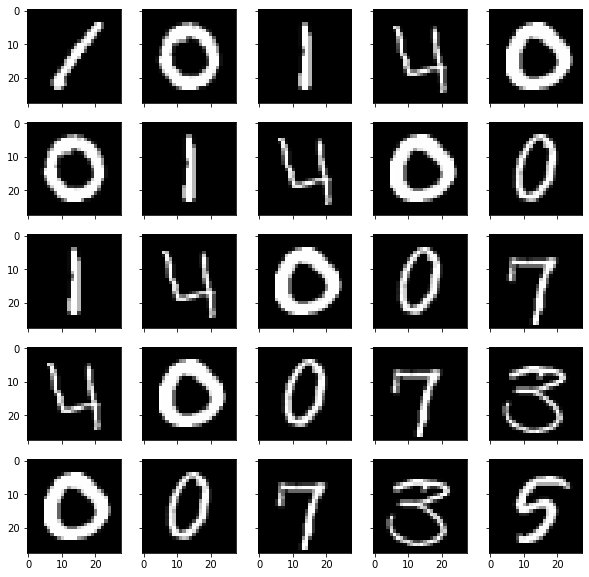

In [ ]:
A3 = 0
data = pd.read_csv('/content/drive/MyDrive/dataset2/train.csv')
data_temp = data.head(5000)
img1 = data.iloc[:25,1:].values
fig, ax = plt.subplots(nrows=5,ncols=5,sharey = True, sharex = True)
fig.set_figwidth(10)
fig.set_figheight(10)
for i in range(5):
  for j in range(5):
    img = img1[i+j].reshape(28,28)
    ax[i,j].imshow(img, cmap='gray')

In [ ]:
x = data_temp.iloc[:,1:].values
ytemp = data_temp.iloc[:,0].values
y = []
for i in range(x.shape[0]):
  row = [(j==ytemp[i]).astype(int) for j in range(10)]
  y.append(row)
y = np.array(y)
y = y.T
x = x.T
print(x.shape[0])
print(y.shape)
print(ytemp.shape)
print(data.shape)

784
(10, 5000)
(5000,)
(42000, 785)


In [ ]:
def sigmoid(z):
  return 1/(1+expit(-z))

def initParas(input_size, hidden1_size, hidden2_size, output_size):
  w1 = np.random.randn(hidden1_size, input_size)
  w2 = np.random.randn(hidden2_size, hidden1_size)
  w3 = np.random.randn(output_size, hidden2_size)
  b1 = np.zeros((hidden1_size, 1))
  b2 = np.zeros((hidden2_size, 1))
  b3 = np.zeros((output_size, 1))

  return (w1,w2,w3, b1, b2, b3)

def forwardProp(x,y, parameters):
  global A3
  w1,w2,w3,b1,b2,b3 = parameters
  m = x.shape[1]

  z1 = np.dot(w1,x) + b1
  a1 = sigmoid(z1)
  z2 = np.dot(w2,a1) + b2
  a2 = sigmoid(z2)
  z3 = np.dot(w3, a2) + b3
  a3 = sigmoid(z3)

  A3 = a3
  return (z1,a1,z2,a2,z3,a3)

def backProp(x,y, forward,parameters):
  w1,w2,w3,b1,b2,b3 = parameters
  z1,a1,z2,a2,z3,a3= forward
  m = x.shape[1]

  dz3 = (y-a3)/m
  dw3 = np.dot(dz3, a2.T)
  db3 = np.sum(dz3, axis =1, keepdims = True) 

  da2 = np.dot(w3.T, dz3)
  dz2 = np.multiply(da2, a2 * (1-a2))
  dw2 = np.dot(dz2, a1.T)
  db2 = np.sum(dz2, axis=1, keepdims = True) 


  da1 = np.dot(w2.T, dz2)
  dz1 = np.multiply(da1, a1 * (1-a1))
  dw1 = np.dot(dz1, x.T)
  db1 = np.sum(dz1, axis=1, keepdims = True) 

  return (dz3, dw3, db3, dz2, dw2, db2, dz1, dw1, db1)

def paraUpdate(parameters, grads, alpha):
  w1,w2,w3,b1,b2,b3 = parameters
  w1 = w1 + alpha*grads[7]
  w2 = w2 + alpha*grads[4]
  w3 = w3 + alpha*grads[1]
  b1 = b1 + alpha*grads[8]
  b2 = b2 + alpha*grads[5]
  b3 = b3 + alpha*grads[2]

  return (w1,w2,w3,b1,b2,b3)

In [ ]:
epochs = 5000
alpha = 0.01
input = 784
hidden1 = 350
hidden2 = 150
output = 10
parameters = initParas(input,hidden1,hidden2,output)

for i in range(epochs):
  forward = forwardProp(x,y,parameters)
  back = backProp(x,y, forward, parameters)
  parameters = paraUpdate(parameters, back, alpha)

In [ ]:
correct = 0
temp = forwardProp(x,y,parameters)
y = y.T
a3 = A3.T
for i in range(x.shape[1]):
  if np.argmax(a3[i]) == ytemp[i]:
    correct+=1
 
print(f'Percent Accuracy: {(correct/5000)*100}%')
print(a3.shape)

Percent Accuracy: 9.879999999999999%
(5000, 10)
